In [1]:
import sksurv
import os
import pandas as pd

In [3]:
os.chdir('C:\\Users\\Kanika Saini\\Desktop\\New Folder (2)\\ProjectDataset')

In [4]:
dt=pd.read_excel('gene + clinical LUSC.xlsx')


In [5]:
dt=dt.set_index(dt.columns[0])

In [23]:
c=pd.read_excel('cox LUSC.xlsx')

In [30]:
result=c.to_records(index=False)

In [29]:
c['Patient\'s Vital Status' ]=c['Patient\'s Vital Status' ].astype('bool')

In [26]:
print(c.columns)

Index(['Patient's Vital Status', 'Overall Survival'], dtype='object')


In [32]:
result

rec.array([(False, 1.2190e+01), (False, 4.4700e+00), (False, 7.5690e+01),
           ( True, 1.2309e+02), (False, 4.8000e+00), ( True, 1.1748e+02),
           (False, 1.1330e+01), (False, 2.3520e+01), (False, 9.2080e+01),
           (False, 3.1960e+01), (False, 3.6040e+01), ( True, 9.2350e+01),
           ( True, 8.6890e+01), (False, 6.1800e+00), (False, 2.7900e+00),
           ( True, 1.5420e+02), ( True, 4.9900e+01), (False, 2.7170e+01),
           ( True, 1.1945e+02), (False, 4.6850e+01), ( True, 9.9080e+01),
           ( True, 7.0110e+01), ( True, 6.0840e+01), (False, 3.4760e+01),
           (False, 1.5570e+01), (False, 3.1700e+01), ( True, 1.2234e+02),
           (False, 9.3300e+00), ( True, 1.1971e+02), (False, 4.3200e+01),
           (False, 3.1600e+01), (False, 8.8040e+01), ( True, 4.1660e+01),
           ( True, 3.3900e+01), (False, 1.0810e+01), ( True, 3.2160e+01),
           (False, 2.1980e+01), (False, 7.3300e+00), (False, 1.4910e+01),
           (False, 4.3000e+00), (False

In [18]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis(alpha=1,verbose=1)
estimator.fit(dt, result)


iter     12: optimization converged


CoxPHSurvivalAnalysis(alpha=1, n_iter=100, tol=1e-09, verbose=1)

In [19]:
pd.Series(estimator.coef_, index=dt.columns)

A4GALT                                                            -0.746004
AASDHPPT                                                           0.159038
ABCA4                                                              1.131167
ABCC1                                                              0.894321
ACER3                                                              0.001257
ACSM3                                                             -0.367472
ACTN1                                                              0.119693
ADCY5                                                             -0.669611
AFF2                                                              -0.263385
ALKBH6                                                            -0.368259
ANO5                                                              -0.412230
ANXA11                                                             0.856122
ANXA1                                                              0.193217
APC2        

In [20]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(dt)
result = concordance_index_censored(c['Patient\'s Vital Status'], c['Overall Survival'], prediction)
result[0]

0.9883448130658405

Text(0.5, 0, 'time $t$')

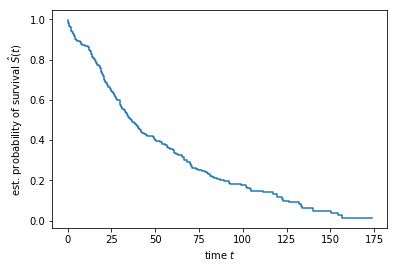

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(c['Patient\'s Vital Status'], c['Overall Survival'])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(dt,result,test_size=0.3)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis(alpha=1,verbose=1)
estimator.fit(X_train, Y_train)
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis(alpha=1,verbose=1)
estimator.fit(X_train, Y_train)
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(X_test)
result = concordance_index_censored(Y_test['Patient\'s Vital Status'], Y_test['Overall Survival'], prediction)
result[0]

(350, 331) (350,)
(151, 331) (151,)
iter     13: optimization converged
iter     13: optimization converged


0.8131465860257838

In [35]:
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sklearn.model_selection import GridSearchCV,KFold

In [38]:
cv=KFold(n_splits=20,shuffle=True,random_state=328)

In [39]:
coxnet=CoxnetSurvivalAnalysis(n_alphas=40,l1_ratio=0.5).fit(X_train,Y_train)
gcv=GridSearchCV(coxnet,{"alphas":[[v] for v in coxnet.alphas_]},cv=cv).fit(X_train,Y_train)

C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: all coefficients are zero, consider decreasing alpha.
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: UserWarning: all coefficients are zero, consider decreasing alpha.
  e

KeyboardInterrupt: 